In [1]:
# Packages have to go in this order... I don't know why

import numpy as np
import pandas as pd
import xarray as xr
import eofs
from eofs.standard import Eof
import glob



# you need intake-esm V 2020.11.4 and intake V 0.6.0

# import tensorflow as tf

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.geometry.polygon import LinearRing


import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib import cm

import copy
import fsspec
import pop_tools
import intake

from sklearn import linear_model
import time

## Functions

In [2]:
def is_feb(month):
    return (month==2)

#use 
#monthly_data = ds.sel(time=is_feb(ds['time.month']))

def is_mar(month):
    return (month==3)

#use 
#monthly_data = ds.sel(time=is_mar(ds['time.month']))

def is_nov(month):
    return (month==10)

#use 
#monthly_data = ds.sel(time=is_nov(ds['time.month']))


def is_dec(month):
    return (month==12)

## Load Files

In [2]:
t=600

save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Daily_Global_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
ds_CTRL_daily = xr.open_dataset(save_name)

save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Weekly_Global_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
ds_CTRL_weekly = xr.open_dataset(save_name)

In [24]:
5215/52

100.28846153846153

In [28]:
%%time
ds_daily_rolling = ds_CTRL_daily.rolling(time=7,center=True).mean()

CPU times: user 8min 9s, sys: 6min 47s, total: 14min 57s
Wall time: 15min 16s


<xarray.Dataset>
Dimensions:     (lat: 192, lon: 288, member_id: 1, nbnd: 2, time: 36500)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id   (member_id) int64 1
  * time        (time) object 0600-01-01 12:00:00 ... 0699-12-31 12:00:00
    time_bnds   (time, nbnd) object 0600-01-01 00:00:00 ... 0700-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    PRECL       (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan
    PSL         (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan
    TS          (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan
    PSL_anom    (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan
    TS_anom     (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan
    PRECL_anom  (member_id, time, lat, lon) float32 nan nan nan ... nan nan nan

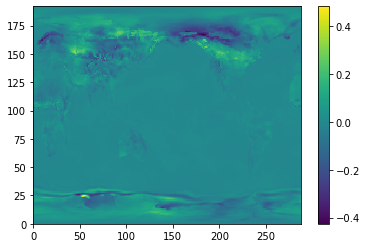

In [22]:
ds =ds_CTRL_daily
monthly_data = ds.sel(time=is_mar(ds['time.month']))
bb = np.array(monthly_data['TS_anom']).squeeze()
np.mean(bb,axis=0)

plt.pcolor(np.mean(bb,axis=0))
plt.colorbar()

In [ ]:
plt.pcolor(np.mean(bb,axis=0))

In [21]:
np.mean(bb)

0.0012444294

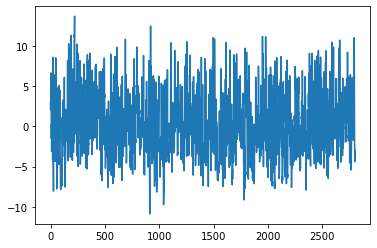

In [9]:
plt.plot(bb[:,20,20])

In [10]:
np.mean(bb[:,20,20])

-0.043642506

In [11]:
#create X fit array. 
dayz = 365 
bias = np.ones([dayz])
harm1s = np.sin(np.linspace(0,1*np.pi,365))
harm1c = np.cos(np.linspace(0,1*np.pi,365))
harm2s = np.sin(np.linspace(0,2*np.pi,365))
harm2c = np.cos(np.linspace(0,2*np.pi,365))
harm3s = np.sin(np.linspace(0,3*np.pi,365))
harm3c = np.cos(np.linspace(0,3*np.pi,365))
harm4s = np.sin(np.linspace(0,4*np.pi,365))
harm4c = np.cos(np.linspace(0,4*np.pi,365))
harm5s = np.sin(np.linspace(0,5*np.pi,365))
harm5c = np.cos(np.linspace(0,5*np.pi,365))
harm6s = np.sin(np.linspace(0,6*np.pi,365))
harm6c = np.cos(np.linspace(0,6*np.pi,365))
harm7s = np.sin(np.linspace(0,7*np.pi,365))
harm7c = np.cos(np.linspace(0,7*np.pi,365))
harm8s = np.sin(np.linspace(0,8*np.pi,365))
harm8c = np.cos(np.linspace(0,8*np.pi,365))

Xmat_1year = np.concatenate([bias[None,...],
                             harm1s[None,...],harm1c[None,...],
                             harm2s[None,...],harm2c[None,...],
                             harm3s[None,...],harm3c[None,...],
                             harm4s[None,...],harm4c[None,...],
                             harm5s[None,...],harm5c[None,...],
                             harm6s[None,...],harm6c[None,...],
                             harm7s[None,...],harm7c[None,...],
                             harm8s[None,...],harm8c[None,...],],axis=0)


Xmat = np.tile(Xmat_1year,int(ds_CTRL_daily['TS'].shape[1]/365))

go grab coffee... this takes a while


In [13]:
TS = np.array(ds_CTRL_daily['TS']).squeeze()
TS_ts = regr.fit(Xmat.T,TS[:,lala,lolo])
TS_anom[:,lala,lolo] = TS[:,lala,lolo]-TS_ts.predict_single(Xmat)

NameError: name 'regr' is not defined

In [19]:
lala=20
lolo=20
regr = BarebonesLinearRegression()
TS_ts = regr.fit(Xmat.T,TS[:,lala,lolo])
pp = TS[:,lala,lolo]-TS_ts.predict_single(Xmat)

In [20]:
np.mean(pp)

-2.3185387126182856e-12

In [14]:
#this speeds it up a little bit
class BarebonesLinearRegression(linear_model.LinearRegression):

    def predict_single(self, x):
        return np.dot(self.coef_, x) + self.intercept_

## Make Tercile Ground Truth

Based on the Johnson et al. version of this bullshit. 

In [ ]:
%%time

ts = [500,600,700,800,900]

for t in ts:
    print('doing:',str(t))
    print('....saving...')
    save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Daily_Rolling7day_Global_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
    ds_rolling = xr.open_dataset(save_name)

In [6]:
t=600
save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Daily_Rolling7day_Global_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
ds_rolling = xr.open_dataset(save_name)
ds_rolling

<xarray.Dataset>
Dimensions:     (lat: 192, lon: 288, member_id: 1, nbnd: 2, time: 36500)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id   (member_id) int64 1
  * time        (time) object 0600-01-01 12:00:00 ... 0699-12-31 12:00:00
    time_bnds   (time, nbnd) object ...
Dimensions without coordinates: nbnd
Data variables:
    PRECL       (member_id, time, lat, lon) float32 ...
    PSL         (member_id, time, lat, lon) float32 ...
    TS          (member_id, time, lat, lon) float32 ...
    PSL_anom    (member_id, time, lat, lon) float32 ...
    TS_anom     (member_id, time, lat, lon) float32 ...
    PRECL_anom  (member_id, time, lat, lon) float32 ...

### Make Date Dataframe

In [12]:
#MJO pandas data frame
DF_verif =pd.DataFrame({'year':ds_rolling['time.year'].data,'month':ds_rolling['time.month'].data,'day':ds_rolling['time.day'].data})
DF_verif.head(10)

,year,month,day
0,600,1,1
1,600,1,2
2,600,1,3
3,600,1,4
4,600,1,5
5,600,1,6
6,600,1,7
7,600,1,8
8,600,1,9
9,600,1,10


In [32]:
PSL_anom = np.array(ds_rolling['PSL_anom']).squeeze()
PRECL_anom = np.array(ds_rolling['PRECL_anom']).squeeze()
TS_anom = np.array(ds_rolling['TS_anom']).squeeze()


In [28]:
TS_terc= np.zeros_like(PSL_anom)
PSL_terc = np.zeros_like(PSL_anom)
PRECL_terc = np.zeros_like(PSL_anom)


In [30]:
idx = DF_verif[(DF_verif['month']==mo) & (DF_verif['day']==da)].index
idx

Int64Index([  194,   559,   924,  1289,  1654,  2019,  2384,  2749,  3114,
             3479,  3844,  4209,  4574,  4939,  5304,  5669,  6034,  6399,
             6764,  7129,  7494,  7859,  8224,  8589,  8954,  9319,  9684,
            10049, 10414, 10779, 11144, 11509, 11874, 12239, 12604, 12969,
            13334, 13699, 14064, 14429, 14794, 15159, 15524, 15889, 16254,
            16619, 16984, 17349, 17714, 18079, 18444, 18809, 19174, 19539,
            19904, 20269, 20634, 20999, 21364, 21729, 22094, 22459, 22824,
            23189, 23554, 23919, 24284, 24649, 25014, 25379, 25744, 26109,
            26474, 26839, 27204, 27569, 27934, 28299, 28664, 29029, 29394,
            29759, 30124, 30489, 30854, 31219, 31584, 31949, 32314, 32679,
            33044, 33409, 33774, 34139, 34504, 34869, 35234, 35599, 35964,
            36329],
           dtype='int64')

In [33]:
TS_day_100 = TS_anom[idx,:,:]

In [42]:
 Period_TS_33=np.percentile(TS_day_100,33.3333,axis=0)

In [37]:
Period_TS_33.shape

(192, 288)

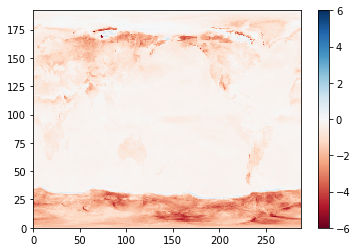

In [43]:
plt.pcolor(Period_TS_33,vmin=-6,vmax=6,cmap='RdBu')
plt.colorbar()

In [3]:
t=600
save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Daily_Rolling7day_Global_with_GroundTruth_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
ds_rolling = xr.open_dataset(save_name)
ds_rolling

<xarray.Dataset>
Dimensions:     (lat: 192, lon: 288, member_id: 1, nbnd: 2, time: 36500)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id   (member_id) int64 1
  * time        (time) object 0600-01-01 12:00:00 ... 0699-12-31 12:00:00
    time_bnds   (time, nbnd) object ...
Dimensions without coordinates: nbnd
Data variables:
    PRECL       (member_id, time, lat, lon) float32 ...
    PSL         (member_id, time, lat, lon) float32 ...
    TS          (member_id, time, lat, lon) float32 ...
    PSL_anom    (member_id, time, lat, lon) float32 ...
    TS_anom     (member_id, time, lat, lon) float32 ...
    PRECL_anom  (member_id, time, lat, lon) float32 ...
    TS_terc     (member_id, time, lat, lon) float32 ...
    PSL_terc    (member_id, time, lat, lon) float32 ...
    PRECL_terc  (member_id, time, lat, lon) float32 ...

In [5]:
TS_terc.shape

(36500, 192, 288)

In [6]:
timy = TS_terc[:,100,100]

In [10]:
np.where(timy==2)[0][-1]

14596

## Seriously Though... this takes forever...

In [4]:

inits = 0 #reinitialize 1 = yes, 0 = no

PSL_anom = np.array(ds_rolling['PSL_anom']).squeeze()
PRECL_anom = np.array(ds_rolling['PRECL_anom']).squeeze()
TS_anom = np.array(ds_rolling['TS_anom']).squeeze()



if inits==0:
    TS_terc= np.array(ds_rolling['TS_terc']).squeeze()
    PSL_terc = np.array(ds_rolling['PSL_terc']).squeeze()
    PRECL_terc = np.array(ds_rolling['PRECL_terc']).squeeze()
    start_loop = np.where(timy==2)[0][-1]

if inits==1:
    TS_terc= np.zeros_like(PSL_anom)
    PSL_terc = np.zeros_like(PSL_anom)
    PRECL_terc = np.zeros_like(PSL_anom)
    start_loop = 0

lat = np.array(ds_rolling['lat']).squeeze()
lon = np.array(ds_rolling['lon']).squeeze()


print('starting at index:',start_loop)
print('....creating indices....')
sys.stdout.flush()
start_time = time.time()
for bb in range(start_loop,len(DF_verif)):
    
    
    mo = DF_verif['month'][bb]
    da = DF_verif['day'][bb]
    idx = DF_verif[(DF_verif['month']==mo) & (DF_verif['day']==da)].index
    
    if bb % 5==0:
        print('time step:',bb,'year:',DF_verif['year'][bb],'day:',da,'month:',mo)
    
    ## Temperature 
    TS_anom[idx,:,:]
    TS_day_100 = TS_anom[idx,:,:]
    Period_TS_66=np.percentile(TS_day_100,66.6666,axis=0)
    Period_TS_33=np.percentile(TS_day_100,33.3333,axis=0)
    verif_TS_val= TS_anom[bb,:,:].squeeze()
    #loop to verify. 
    TS_full_verif3366 = np.concatenate([verif_TS_val[None,...],Period_TS_33[None,...],Period_TS_66[None,...]])
    TS_full_verif3366= np.sort(TS_full_verif3366,axis=0)
    
    
    ## PSL 
    PSL_anom[idx,:,:]
    PSL_day_100 = TS_anom[idx,:,:]
    Period_PSL_66=np.percentile(PSL_day_100,66.6666,axis=0)
    Period_PSL_33=np.percentile(PSL_day_100,33.3333,axis=0)
    verif_PSL_val= TS_anom[bb,:,:].squeeze()
    #loop to verify. 
    PSL_full_verif3366 = np.concatenate([verif_PSL_val[None,...],Period_PSL_33[None,...],Period_PSL_66[None,...]])
    PSL_full_verif3366= np.sort(PSL_full_verif3366,axis=0)
    
    
    ## PRECL 
    PRECL_anom[idx,:,:]
    PRECL_day_100 = PRECL_anom[idx,:,:]
    Period_PRECL_66=np.percentile(PRECL_day_100,66.6666,axis=0)
    Period_PRECL_33=np.percentile(PRECL_day_100,33.3333,axis=0)
    verif_PRECL_val= TS_anom[bb,:,:].squeeze()
    #loop to verify. 
    PRECL_full_verif3366 = np.concatenate([verif_PRECL_val[None,...],Period_PRECL_33[None,...],Period_PRECL_66[None,...]])
    PRECL_full_verif3366= np.sort(PRECL_full_verif3366,axis=0)
    
    
    
    
    vertemp = np.zeros([lat.shape[0],lon.shape[0]])
    verPSL = np.zeros([lat.shape[0],lon.shape[0]])
    verPRECL = np.zeros([lat.shape[0],lon.shape[0]])
    for ii in range(lat.shape[0]):
        for jj in range(lon.shape[0]):
            
            if np.isnan(verif_TS_val[ii,jj]):
                vertemp[ii,jj]=np.nan
                verPSL[ii,jj]=np.nan
                verPRECL[ii,jj]=np.nan
            else:
                vertemp[ii,jj] = int(np.where(verif_TS_val[ii,jj]==TS_full_verif3366[:,ii,jj])[0][0])
                verPSL[ii,jj] = int(np.where(verif_PSL_val[ii,jj]==PSL_full_verif3366[:,ii,jj])[0][0])
                verPRECL[ii,jj] = int(np.where(verif_PSL_val[ii,jj]==PRECL_full_verif3366[:,ii,jj])[0][0])
            
            
    TS_terc[bb,:,:] = vertemp
    PSL_terc[bb,:,:] = verPSL
    PRECL_terc[bb,:,:] = verPRECL
    
#     threethree = scipy.stats.norm.ppf(.333333, loc=Period_mean, scale=Period_std)
#     sixsix = scipy.stats.norm.ppf(.666666, loc=Period_mean, scale=Period_std)
    
    
    if (bb % (365*10)==0) & (bb>0):
        TS_terc=np.expand_dims(TS_terc,axis=0)
        PSL_terc=np.expand_dims(PSL_terc,axis=0)
        PRECL_terc=np.expand_dims(PRECL_terc,axis=0)
        ds_rolling['TS_terc']=(['member_id', 'time', 'lat','lon'],TS_terc)        
        ds_rolling['PSL_terc']=(['member_id', 'time', 'lat','lon'],PSL_terc)
        ds_rolling['PRECL_terc']=(['member_id', 'time', 'lat','lon'],PRECL_terc)


        print('saving in loop:',bb,'year:',DF_verif['year'][bb])
        save_name='/glade/scratch/wchapman/ASP_summerschool/datsets/Daily_Rolling7day_Global_with_GroundTruth_LENS_CTRL_PSL_TS_PRECL_'+str(t)+'_'+str(t+99)+'.nc'
        ds_rolling.to_netcdf(save_name)
        print('....saved...')
        
        TS_terc= TS_terc.squeeze()
        PSL_terc= PSL_terc.squeeze()
        PRECL_terc= PRECL_terc.squeeze()
    

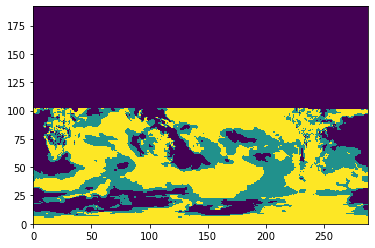

In [65]:
plt.pcolor(vertemp)

In [66]:
np.unique(vertemp)

array([0., 1., 2.])

In [70]:
len(DF_verif)

36500